      数据探索性分析与数据预处理
   
   计算机学院    马渊沐   3220220949

数据集1：MovieLens 10M Dataset (Latest Version)

1.1 数据摘要

MovieLens 10M Dataset数据集中包含了电影数据集、打分数据集、标签数据集，其中movies.dat（电影数据集）包含电影ID、电影名称、电影类型等属性；ratings.dat（打分数据集）包含⽤户ID、电影ID、打分等属性；tags.dat（标签数据集）包含⽤户ID、电影ID、标签内容、时间戳等属性。 

（1）标称属性的数据摘要
包括电影名称、电影类型、用户ID等属性

In [13]:
import os.path as osp
import pandas as pd

# 导入数据
dataset = "./datasets/MovieLens"

#依次读取电影数据集、打分数据集、标签数据集
movies_df = pd.read_csv(osp.join(dataset, 'movies.dat'), sep='::', names=['movieId', 'title', 'genres'], engine='python')
ratings_df = pd.read_csv(osp.join(dataset, 'ratings.dat'), sep='::', names=['userId', 'movieId', 'rating', 'timestamp'], engine='python')
tags_df = pd.read_csv(osp.join(dataset, 'tags.dat'), sep='::', names=['userId', 'movieId', 'tag', 'timestamp'], engine='python')

# 电影类型数据摘要
genres = movies_df['genres'].str.split('|', expand=True).unstack().dropna()
genres_a = genres.value_counts()
print('电影类型: \n',genres_a)

电影类型: 
 Drama                 5339
Comedy                3703
Thriller              1706
Romance               1685
Action                1473
Crime                 1118
Adventure             1025
Horror                1013
Sci-Fi                 754
Fantasy                543
Children               528
War                    511
Mystery                509
Documentary            482
Musical                436
Animation              286
Western                275
Film-Noir              148
IMAX                    29
(no genres listed)       1
dtype: int64


可以看出，该数据集中有20种电影类型，其中Drama、Comedy、Thriller为数量前三的电影类型。

In [14]:
# ⽤户ID数据摘要
user_a = ratings_df['userId'].value_counts()
print('⽤户ID: \n',user_a)

⽤户ID: 
 59269    7359
67385    7047
14463    5169
68259    4483
27468    4449
         ... 
8773       20
54021      20
8789       20
12650      20
16401      20
Name: userId, Length: 69878, dtype: int64


In [15]:
# 电影名称数据摘要
title_a = movies_df['title'].value_counts()
print('电影名称: \n',title_a)

电影名称: 
 War of the Worlds (2005)                                                2
Last Tycoon, The (1976)                                                 1
Money for Nothing (1993)                                                1
Silencers, The (1966)                                                   1
Where Angels Go, Trouble Follows (1968)                                 1
                                                                       ..
Anguish (Angustia) (1987)                                               1
Blood Spattered Bride, The (La Novia Ensangrentada) (1972)              1
City of the Living Dead (Paura nella città dei morti viventi) (1980)    1
Endless Summer, The (1966)                                              1
Blackadder Back & Forth (1999)                                          1
Name: title, Length: 10680, dtype: int64


可以看出，该数据集中共有10681部电影，几乎所有的电影都只有1条记录。

（2）数值属性的数据摘要可以看出，该数据集中有20种电影类型，其中Drama、Comedy、Thriller为数量前三的电影类型。
包括打分、时间戳属性

In [18]:
# 评分数据摘要
rating_a = ratings_df['rating'].value_counts()
rating_null = ratings_df['rating'].isnull().sum()
print('打分: \n',rating_a)
print('缺失值数量: ', rating_null)

打分: 
 4.0    2875850
3.0    2356676
5.0    1544812
3.5     879764
2.0     790306
4.5     585022
1.0     384180
2.5     370178
1.5     118278
0.5      94988
Name: rating, dtype: int64
缺失值数量:  0


可以看出，用户打分数据分布在0.5分至5分之间，其中打4分的数量最多，打0.5分的数量最小，该数据没有缺失值。

In [17]:
# 时间戳数据摘要
timestamp_a = ratings_df['timestamp'].describe()
timestamp_null = ratings_df['timestamp'].isnull().sum()
print('时间戳: \n',timestamp_a)
print('缺失值数量: ',timestamp_null )

时间戳: 
 count    1.000005e+07
mean     1.032606e+09
std      1.159640e+08
min      7.896520e+08
25%      9.467659e+08
50%      1.035476e+09
75%      1.126749e+09
max      1.231132e+09
Name: timestamp, dtype: float64
缺失值数量:  0


In [ ]:
可以看出，时间戳数据中没有缺失值。

1.2 数据可视化

使用直方图、盒图等检查数据分布及离群点，对该数据集中的打分数据进行可视化

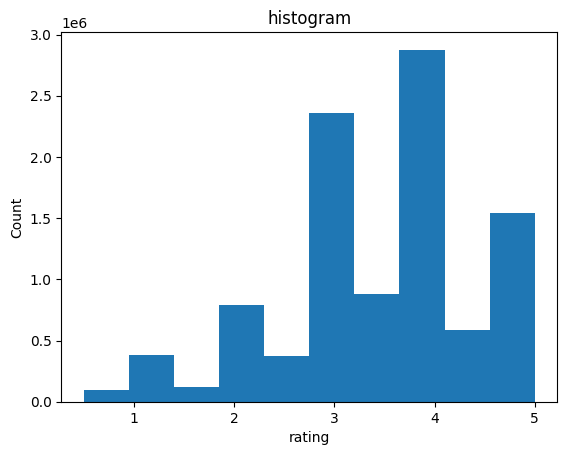

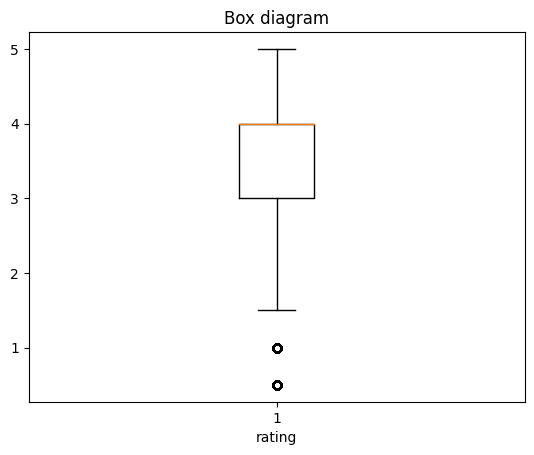

In [22]:
import matplotlib.pyplot as plt
# 绘制打分数据直⽅图
plt.hist(ratings_df['rating'])
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('histogram')
plt.show()
#  绘制打分数据盒图
plt.boxplot(ratings_df['rating'])
plt.xlabel('rating')
plt.title('Box diagram')
plt.show()

1.3 数据缺失处理

观察数据集中缺失数据，分析缺失原因。分别使用以下4中策略对缺失值进行处理：
*将缺失部分剔除
*用最高频率值来填补缺失值
*通过属性的相关关系来填补缺失值
*通过数据对象之间的相似性来填补缺失值

经上述统计，电影数据集、打分数据集中缺失值数量为0，缺失数据集为标签数据集。

In [30]:
import seaborn as sns
# 统计标签数据集中的缺失值数量
tags_null = tags_df.isnull().sum()
print("tag中的缺失值数量： \n",tags_null)

# 统计每种tag值的数量
tag_counts = tags_df['tag'].value_counts()
print(tag_counts)

tag中的缺失值数量： 
 userId        0
movieId       0
tag          16
timestamp     0
tag_num      16
dtype: int64
Tumey's DVDs                    641
classic                         621
based on a book                 549
R                               518
less than 300 ratings           505
                               ... 
Shane Black                       1
Michael Winterbottom              1
I can't turn away                 1
though I know I should . . .      1
a old story of fight              1
Name: tag, Length: 16528, dtype: int64
0         2099.0
1           59.0
2           98.0
3         4714.0
4        13121.0
          ...   
95575     3251.0
95576       99.0
95577        9.0
95578     3251.0
95579     2546.0
Name: tag_num, Length: 95580, dtype: float64


可以看出，标签数据集中只有tag列数据缺失。对以下4中处理缺失值的方法：
*将缺失部分剔除
*用最高频率值来填补缺失值
*通过属性的相关关系来填补缺失值
*通过数据对象之间的相似性来填补缺失值

由于tag列的值为文本数据，无法通过属性的相关关系和数据对象之间的相似性完成缺失值填补，以下采用①将缺失部分剔除；②用最高频率值填补缺失值进行分析处理。

In [37]:
#①将缺失部分剔除；
tags_dele = tags_df.dropna()
print("剔除缺失值前的数据集⼤⼩: ",{tags_df.shape})
print("剔除缺失值后的数据集⼤⼩: ", {tags_dele.shape})
#统计剔除后数据缺失情况
tags_dele_null = tags_dele.isnull().sum()
print("将缺失部分剔除后缺失值统计：\n",tags_dele_null)

剔除缺失值前的数据集⼤⼩:  {(95580, 5)}
剔除缺失值后的数据集⼤⼩:  {(95564, 5)}
将缺失部分剔除后缺失值统计：
 userId       0
movieId      0
tag          0
timestamp    0
tag_num      0
dtype: int64


可以看出，使用①将缺失部分剔除 进行缺失值处理后，数据量较初始数据少16条，处理完成后数据不再缺失。

In [42]:
# ②用最高频率值填补缺失值
fill_tag = tags_dele["tag"].mode()[0]
tags_fill = tags_df.fillna({"tag": fill_tag})
print("用最高频率值填补缺失值前的数据集⼤⼩: ",{tags_df.shape})
print("用最高频率值填补缺失值后的数据集⼤⼩: ", {tags_fill.shape})
#统计剔除后数据缺失情况
tags_fill_null = tags_fill.isnull().sum()
print("将缺失部分剔除后缺失值统计：\n",tags_fill_null)

用最高频率值填补缺失值前的数据集⼤⼩:  {(95580, 5)}
用最高频率值填补缺失值后的数据集⼤⼩:  {(95580, 5)}
将缺失部分剔除后缺失值统计：
 userId        0
movieId       0
tag           0
timestamp     0
tag_num      16
dtype: int64


可以看出，使用②用最高频率值填补缺失值 进行缺失值处理后，数据量不变，且填补后标签数据集中不再有缺失数据。

至此，数据集1处理完毕。

##数据集2：Alzheimer Disease and Healthy Aging Data In US

导入使用的库和数据集，使用pandas导入数据,matplotlib进行数据可视化。

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 加载数据集
df = pd.read_csv('./datasets/Alzheimer Disease and Healthy Aging Data In US.csv', low_memory=False)

2.1 数据摘要

标称属性：计算每个可能取值的频数；
数值属性：给出5数概况及缺失值的个数。

In [49]:
# 标称属性：计算每个可能取值的频数；
biaocheng_attributes = ['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question','Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'StratificationCategory1','Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation']
for attribute in biaocheng_attributes:
    print("每个可能取值的频数: \n", df[attribute].value_counts())

每个可能取值的频数: 
 2015    45980
2020    36006
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearStart, dtype: int64
每个可能取值的频数: 
 2020    46966
2015    35020
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearEnd, dtype: int64
每个可能取值的频数: 
 US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3348
MT      3348
DE      3346
NH      3284
VT      3278
MA      3174
PR     

In [51]:
number_attributes = ['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']
number_data = df[number_attributes]
#数值属性的5数概括
data_des = number_data.describe()
print("数值属性的5数概括： \n",data_des)
#数值属性的缺失值统计
data_null = number_data.isna().sum()
print("数值属性的缺失值数量： \n",data_null)

数值属性的5数概括： 
            YearStart        YearEnd     Data_Value  Data_Value_Alt  \
count  214462.000000  214462.000000  144629.000000   144629.000000   
mean     2017.378477    2017.634000      37.341956       37.341956   
std         1.779822       1.778926      25.183017       25.183017   
min      2015.000000    2015.000000       0.000000        0.000000   
25%      2016.000000    2016.000000      15.300000       15.300000   
50%      2017.000000    2018.000000      32.500000       32.500000   
75%      2019.000000    2019.000000      56.800000       56.800000   
max      2020.000000    2020.000000     100.000000      100.000000   

       Sample_Size  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  
数值属性的缺失值数量： 
 YearStart                     0
YearEnd                       0
Data_Value                69833
Data_Value_Alt            69833
Low_Confidence_Limit     

2.2 数据可视化

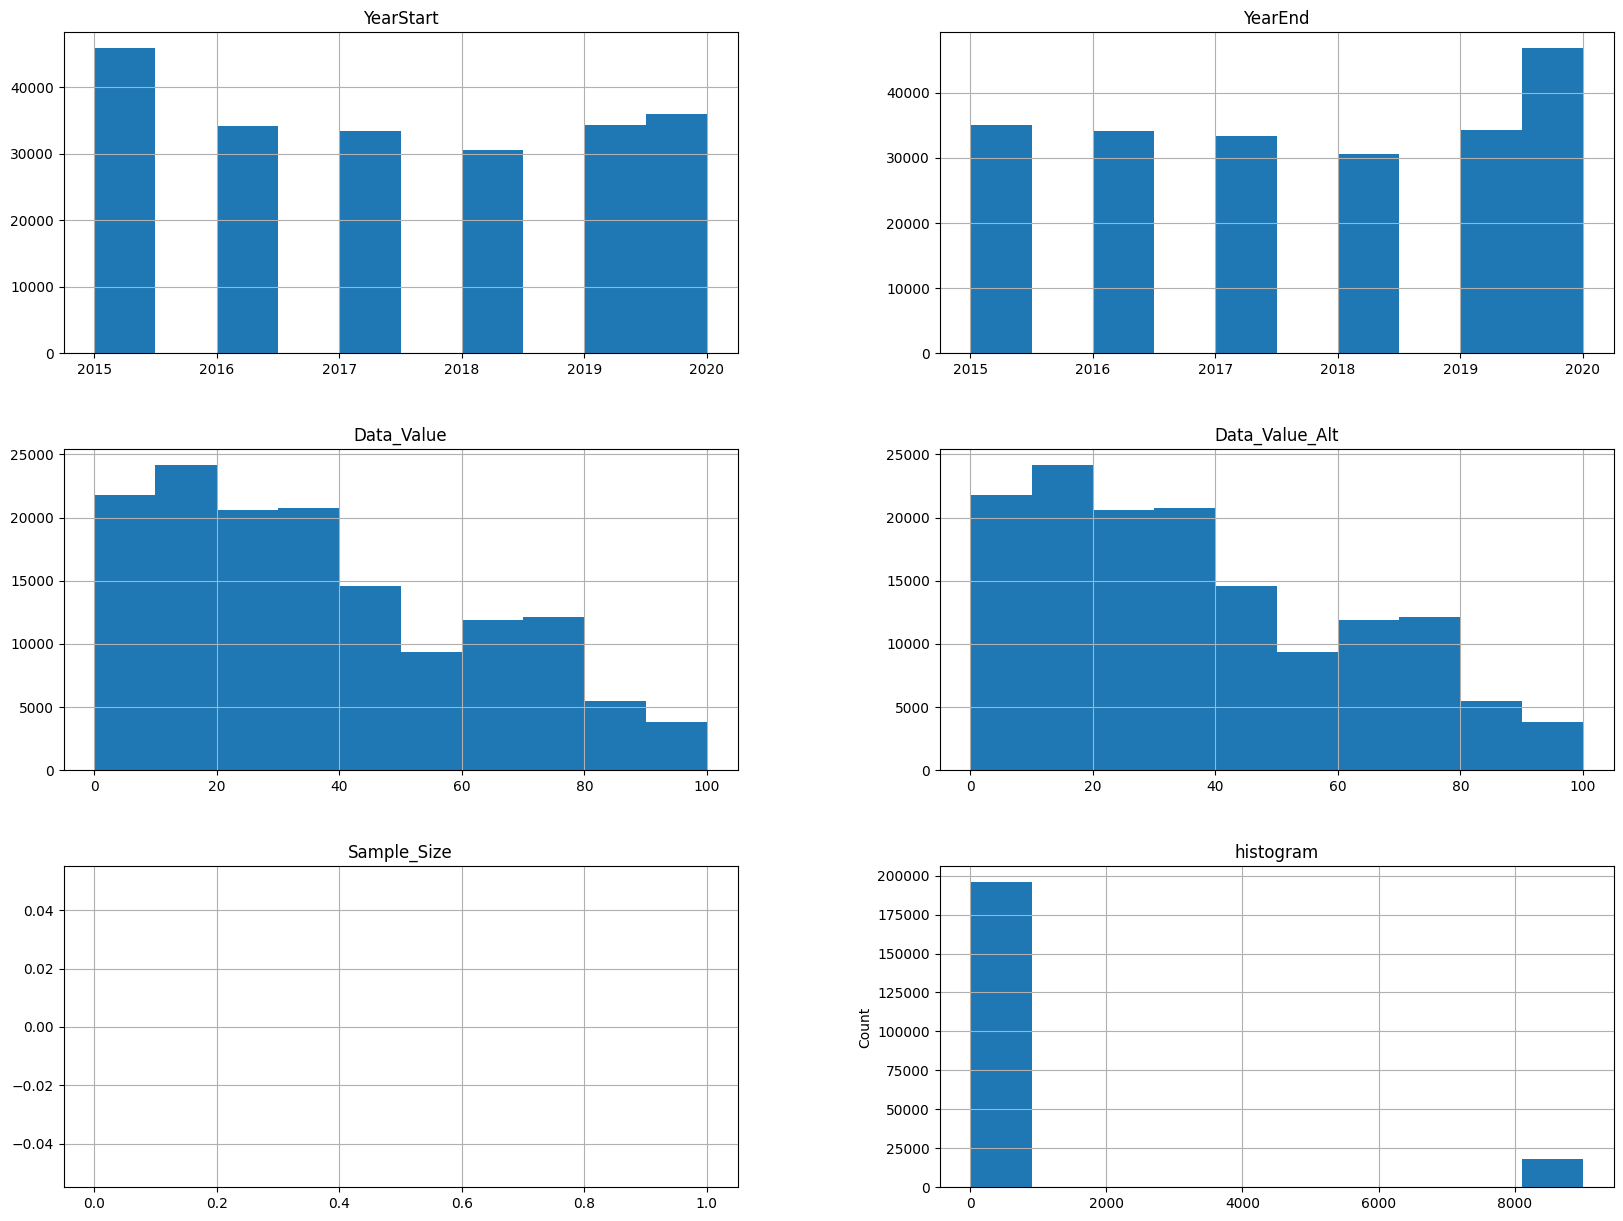

In [55]:
#该数据集的直方图
df.hist(bins=10, figsize=(20,15))
plt.ylabel('Count')
plt.title('histogram')
plt.show()

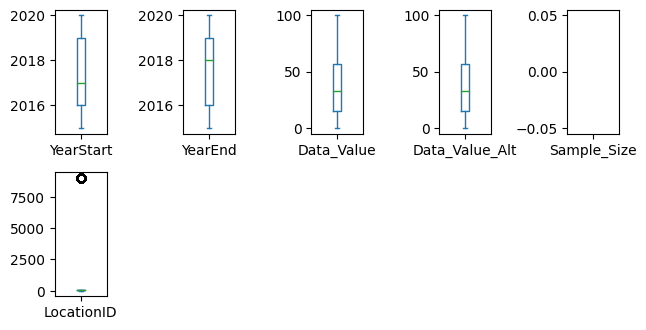

In [56]:
#该数据集的盒图
#df.boxplot(figsize=(20,5))
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.tight_layout()
plt.title('Box diagram')
plt.show()

由盒图可以看出，LocationID存在离群点。

In [59]:
Q1, Q3 = df['LocationID'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['LocationID'] < lower_bound) | (df['LocationID'] > upper_bound)]
print("离群点信息： \n",outliers)

离群点信息： 
         YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
19           2019     2019          MDW      Midwest      BRFSS   
20           2020     2020          NRE    Northeast      BRFSS   
21           2020     2020          SOU        South      BRFSS   
22           2019     2019          SOU        South      BRFSS   
23           2020     2020         WEST         West      BRFSS   
...           ...      ...          ...          ...        ...   
211547       2017     2017         WEST         West      BRFSS   
211548       2015     2015         WEST         West      BRFSS   
211549       2015     2015         WEST         West      BRFSS   
211555       2015     2015         WEST         West      BRFSS   
211558       2018     2018         WEST         West      BRFSS   

                          Class  \
19                Mental Health   
20      Smoking and Alcohol Use   
21               Overall Health   
22      Smoking and Alcohol Use   
23         

2.3 缺失值处理

*将缺失部分剔除
*用最高频率值来填补缺失值
*通过属性的相关关系来填补缺失值
*通过数据对象之间的相似性来填补缺失值

In [60]:
#统计各属性的缺失值情况
missing_values_count = df.isnull().sum()
print("各属性缺失值数量： \n", missing_values_count)

各属性缺失值数量： 
 YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit                   0
DataValueTypeID                   0
Data_Value_Type                   0
Data_Value                    69833
Data_Value_Alt                69833
Low_Confidence_Limit          69990
High_Confidence_Limit         69990
Sample_Size                  214462
StratificationCategory1           0
Stratification1                   0
StratificationCategory2       27669
Stratification2               27669
Geolocation                   23049
ClassID                           0
TopicID                           0
QuestionID                        0
LocationID                        0
StratificationCategoryID1         0
StratificationID1                 0
StratificationCa

可以看出，有8个属性存在缺失值，其中Sample_Size列数据缺失值最多。下面分别采用4种方式进行缺失值处理
①将缺失部分剔除

In [61]:
# ①将缺失部分剔除
df_del = df.dropna()

print("删除缺失值前数据集形状： ", df.shape)
print("删除缺失值后数据集形状： ", df_del.shape)

删除缺失值前数据集形状：  (214462, 29)
删除缺失值后数据集形状：  (0, 29)


可以看出，通过方式①将缺失部分剔除 进行缺失值处理后，数据集大量减少，说明该方式删除了原数据集中的大量数据，影响数据的完整性。

②用最高频率值来填补缺失值

In [62]:
#②用最高频率值来填补缺失值
mode = df['Data_Value'].mode()[0]
df_fill_2 = df.fillna({'Data_Value': mode})
print("用最高频率值来填补缺失值前数据集形状： ", df.shape)
print("用最高频率值来填补缺失值后数据集形状： ", df_fill_2.shape)

删除缺失值前数据集形状：  (214462, 29)
删除缺失值后数据集形状：  (214462, 29)


③通过属性的相关关系来填补缺失值

In [65]:
df = pd.read_csv('./datasets/Alzheimer Disease and Healthy Aging Data In US.csv', low_memory=False)
#计算属性的相关系数
df_fillna_corr = df.copy()
corr_matrix = df_fillna_corr.corr()
for column in df_fillna_corr.columns:
    if df_fillna_corr[column].dtype != object:
        if df_fillna_corr[column].isnull().sum() > 0:
            correlated_column = corr_matrix[column].sort_values(ascending=False).index[1]
            df_fillna_corr[column].fillna(df_fillna_corr.groupby(correlated_column)[column].transform('median'), inplace=True)
df_fillna_corr.isnull().sum()

C:\Users\59554\AppData\Local\Temp\ipykernel_17116\3806740763.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_fillna_corr.corr()


YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit                   0
DataValueTypeID                   0
Data_Value_Type                   0
Data_Value                    69833
Data_Value_Alt                69833
Low_Confidence_Limit          69990
High_Confidence_Limit         69990
Sample_Size                  214462
StratificationCategory1           0
Stratification1                   0
StratificationCategory2       27669
Stratification2               27669
Geolocation                   23049
ClassID                           0
TopicID                           0
QuestionID                        0
LocationID                        0
StratificationCategoryID1         0
StratificationID1                 0
StratificationCategoryID2   